# Import important libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Models
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Model Evalutaion
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Read Files

In [11]:
# Read Connectome DF
df_connectcome = pd.read_csv("TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")
print("df_connectome size:",df_connectcome.shape)

df_connectome size: (1213, 19901)


In [12]:
# Read Categorical DF
df_cat = pd.read_excel("TRAIN_CATEGORICAL_METADATA_new.xlsx")
print("df_cat size:",df_cat.shape)

df_cat size: (1213, 10)


In [13]:
# Read Quantitative DF
df_quant = pd.read_excel("TRAIN_QUANTITATIVE_METADATA_new.xlsx")
print("df_quant size:",df_quant.shape)

df_quant size: (1213, 19)


In [14]:
# Read Solutions DF
df_solutions = pd.read_excel("TRAINING_SOLUTIONS.xlsx")
print("df_solutions size:",df_solutions.shape)

df_solutions size: (1213, 3)


In [15]:
# align the patient records by merging on the "participant ID" on all df (df_cat, df_quant, df_connectcom & df_solutions)
tmp = pd.merge(df_cat, df_quant, on = 'participant_id')
tmp1 = pd.merge(tmp, df_connectcome, on = 'participant_id')
df = pd.merge(tmp1, df_solutions, on = 'participant_id')

In [17]:
# extract df_cat columns and set participant ID as index
df_cat = df.loc[:, 'Basic_Demos_Enroll_Year':'Barratt_Barratt_P2_Occ']
df_cat['participant_id'] = df['participant_id']
df_cat.set_index('participant_id', inplace=True)
df_cat.head()

# Drop columns
df_cat.drop(columns=['Basic_Demos_Enroll_Year','PreInt_Demos_Fam_Child_Ethnicity'],inplace = True)

In [18]:
# extract df_quant columns and set participant ID as index
df_quant = df.loc[:, 'EHQ_EHQ_Total':'MRI_Track_Age_at_Scan']
df_quant['participant_id'] = df['participant_id']
df_quant.set_index('participant_id', inplace=True)
df_quant.head()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
participant_id,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [19]:
# extract df_connectcome columns and set participant ID as index
df_connectcome = df.loc[:, '0throw_1thcolumn':'198throw_199thcolumn']
df_connectcome['participant_id'] = df['participant_id']
df_connectcome.set_index('participant_id', inplace=True)
df_connectcome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,0.049068,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,0.181864,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,0.519783,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,-0.004607,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,0.226854,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [20]:
# extract df_solutions columns and set participant ID as index
df_solutions = df.loc[:, 'ADHD_Outcome':'Sex_F']
df_solutions['participant_id'] = df['participant_id']
df_solutions.set_index('participant_id', inplace=True)
df_solutions.head()

,ADHD_Outcome,Sex_F
participant_id,,
00aIpNTbG5uh,1,0
00fV0OyyoLfw,1,0
04X1eiS79T4B,0,1
05ocQutkURd6,0,1
06YUNBA9ZRLq,1,0


# EDA

In [22]:
df_connectcome.head()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
participant_id,,,,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,0.361339,0.791402,0.530706,0.623133,0.845830,0.680234,0.537144,0.387455,0.498571,0.049068,...,-0.047477,-0.096450,-0.280312,0.037560,0.423037,0.242453,0.336213,0.402338,0.327915,0.539032
00fV0OyyoLfw,0.051430,0.613198,0.635255,0.391237,0.451225,0.600475,0.420935,0.234825,0.322048,0.181864,...,-0.143218,-0.276464,-0.332783,-0.332711,0.556939,0.475578,0.429196,0.457970,0.312571,0.595978
04X1eiS79T4B,-0.305747,0.750316,-0.005342,0.458421,0.757530,0.756288,0.799046,0.622567,0.659165,0.519783,...,-0.133778,-0.108588,-0.002132,-0.175586,0.679183,0.290292,0.486680,0.255208,0.575017,0.605182
05ocQutkURd6,0.450442,0.731530,0.799147,0.701688,0.747468,0.523304,0.575033,0.187189,0.441150,-0.004607,...,-0.096647,-0.041420,-0.199576,-0.216457,0.519074,0.298586,0.415466,0.511607,0.361204,0.446613
06YUNBA9ZRLq,0.415220,0.585700,0.355835,0.664142,0.683491,0.380201,0.375091,0.212314,0.445294,0.226854,...,-0.158995,-0.274017,-0.141012,-0.002865,0.515169,0.336139,0.316430,0.442230,0.177079,0.378278


In [23]:
df_cat.info()
df_cat.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 00aIpNTbG5uh to Zye7yYRQohXi
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Basic_Demos_Study_Site       1213 non-null   int64  
 1   PreInt_Demos_Fam_Child_Race  1159 non-null   float64
 2   MRI_Track_Scan_Location      1210 non-null   float64
 3   Barratt_Barratt_P1_Edu       1198 non-null   float64
 4   Barratt_Barratt_P1_Occ       1182 non-null   float64
 5   Barratt_Barratt_P2_Edu       1015 non-null   float64
 6   Barratt_Barratt_P2_Occ       991 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 75.8+ KB


,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
participant_id,,,,,,,
00aIpNTbG5uh,4,0.0,3.0,21.0,45.0,NaN,NaN
00fV0OyyoLfw,1,9.0,2.0,21.0,0.0,21.0,45.0
04X1eiS79T4B,1,2.0,2.0,9.0,0.0,NaN,NaN
05ocQutkURd6,1,8.0,2.0,18.0,10.0,18.0,0.0
06YUNBA9ZRLq,1,1.0,2.0,12.0,0.0,NaN,NaN


In [24]:
df_quant.info()
df_quant.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1213 entries, 00aIpNTbG5uh to Zye7yYRQohXi
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   EHQ_EHQ_Total               1200 non-null   float64
 1   ColorVision_CV_Score        1190 non-null   float64
 2   APQ_P_APQ_P_CP              1201 non-null   float64
 3   APQ_P_APQ_P_ID              1201 non-null   float64
 4   APQ_P_APQ_P_INV             1201 non-null   float64
 5   APQ_P_APQ_P_OPD             1201 non-null   float64
 6   APQ_P_APQ_P_PM              1201 non-null   float64
 7   APQ_P_APQ_P_PP              1201 non-null   float64
 8   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 9   SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 10  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 11  SDQ_SDQ_Externalizing       1204 non-null   float64
 12  SDQ_SDQ_Generating_Impact   1204 non-null   float64
 13  SDQ_SDQ_Hyperactivi

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
participant_id,,,,,,,,,,,,,,,,,,
00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574


In [25]:
df_solutions.head()

,ADHD_Outcome,Sex_F
participant_id,,
00aIpNTbG5uh,1,0
00fV0OyyoLfw,1,0
04X1eiS79T4B,0,1
05ocQutkURd6,0,1
06YUNBA9ZRLq,1,0


In [27]:
df_solutions.value_counts()

ADHD_Outcome  Sex_F
1             0        581
              1        250
0             0        216
              1        166
Name: count, dtype: int64

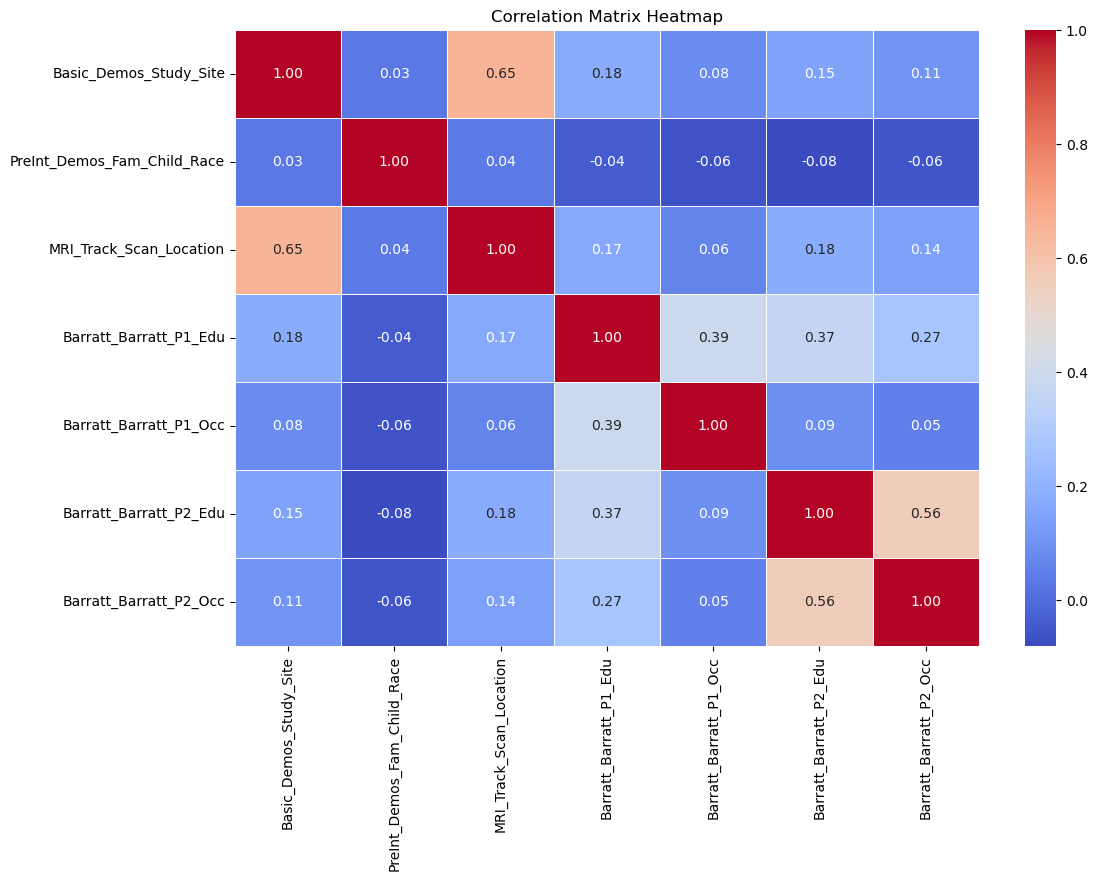

In [29]:
# correlation matrix for categorical data
correlation_matrix_cat = df_cat.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_cat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

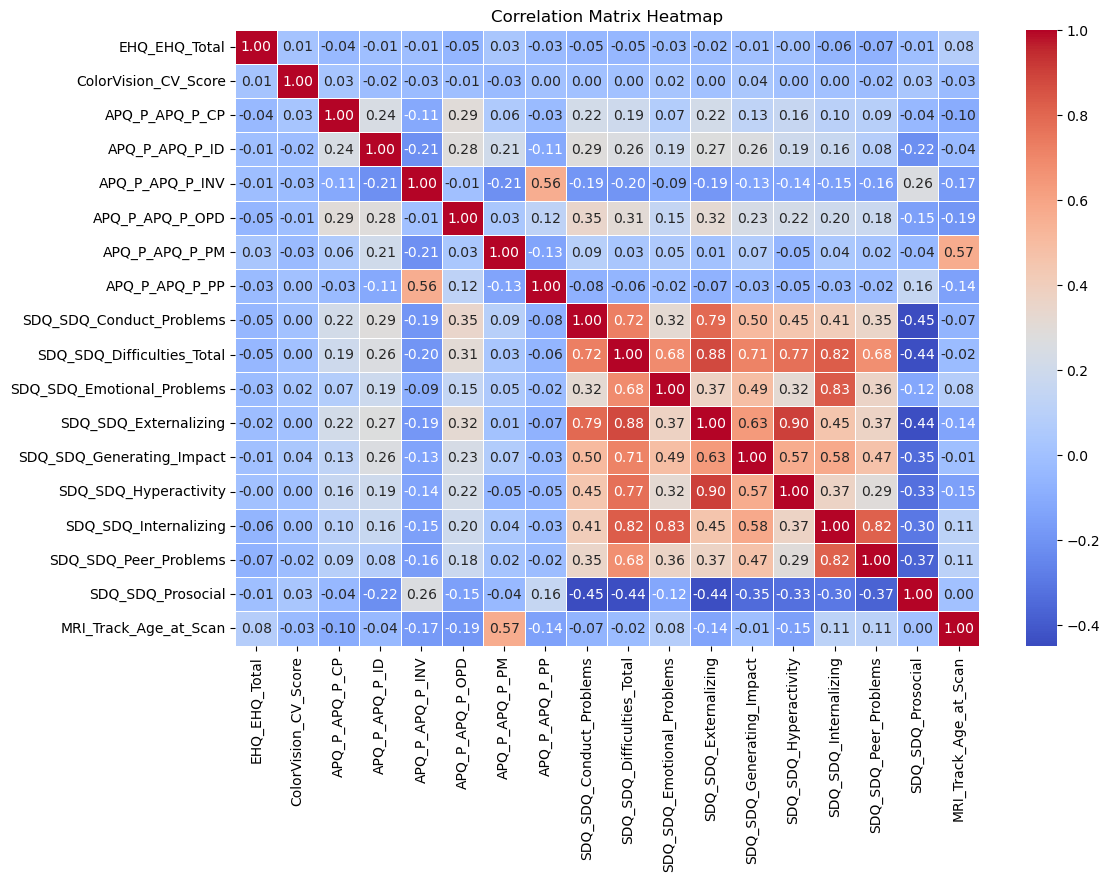

In [31]:
# correlation matrix for quantitative data
correlation_matrix_quant = df_quant.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_quant, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Handling missing categorical data

In [34]:
df_cat.isna().sum()

Basic_Demos_Study_Site           0
PreInt_Demos_Fam_Child_Race     54
MRI_Track_Scan_Location          3
Barratt_Barratt_P1_Edu          15
Barratt_Barratt_P1_Occ          31
Barratt_Barratt_P2_Edu         198
Barratt_Barratt_P2_Occ         222
dtype: int64

In [36]:
missing_percentage = df_cat.isnull().mean() * 100
for column, miss in missing_percentage.items():
    if miss < 5.0:
        # since the missing values are less than 5% of the data, the are considered to be missinf completely at randaom and therefore imputed by the mean
        mode_value = df_cat[column].mode(dropna=True)[0]
        df_cat[column].fillna(mode_value, inplace=True)
    else:
        print(column)

Barratt_Barratt_P2_Edu
Barratt_Barratt_P2_Occ


C:\Users\hp\AppData\Local\Temp\ipykernel_2780\1314599904.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat[column].fillna(mode_value, inplace=True)


In [38]:
# data missing in Barratt_Barratt_P2_Occ is missing not at random (MNAR) and data missing in Barratt_Barratt_P2_Edu is missing at random (MAR)
(df_cat['Barratt_Barratt_P2_Edu'].isnull() & df_cat['Barratt_Barratt_P2_Occ'].isnull() ).mean()

0.15169002473206925

In [40]:
# if occupation is missing but education is available, impute the occupation with the mode occupation of the eduaction
mode_per_edu = df_cat.groupby('Barratt_Barratt_P2_Edu')['Barratt_Barratt_P2_Occ'].agg(lambda x: x.mode()[0])

def fill_occ(row):
    if pd.isna(row['Barratt_Barratt_P2_Occ']) and pd.notna(row['Barratt_Barratt_P2_Edu']):
        return mode_per_edu.get(row['Barratt_Barratt_P2_Edu'], row['Barratt_Barratt_P2_Occ'])
    return row['Barratt_Barratt_P2_Occ']

df_cat['Barratt_Barratt_P2_Occ'] = df_cat.apply(fill_occ, axis=1)

mode_per_edu = df_cat.groupby('Barratt_Barratt_P2_Occ')['Barratt_Barratt_P2_Edu'].agg(lambda x: x.mode()[0])

def fill_occ(row):
    if pd.isna(row['Barratt_Barratt_P2_Edu']) and pd.notna(row['Barratt_Barratt_P2_Occ']):
        return mode_per_edu.get(row['Barratt_Barratt_P2_Occ'], row['Barratt_Barratt_P2_Edu'])
    return row['Barratt_Barratt_P2_Edu']

df_cat['Barratt_Barratt_P2_Edu'] = df_cat.apply(fill_occ, axis=1)

# if both Barratt_Barratt_P2_Edu and Barratt_Barratt_P2_Occ are missing impute the edu with -3 and the occ with -5
both_missing = df_cat['Barratt_Barratt_P2_Edu'].isna() & df_cat['Barratt_Barratt_P2_Occ'].isna()

df_cat.loc[both_missing, 'Barratt_Barratt_P2_Edu'] = 0
df_cat.loc[both_missing, 'Barratt_Barratt_P2_Occ'] = -1

In [42]:
df_cat.isna().sum()

Basic_Demos_Study_Site         0
PreInt_Demos_Fam_Child_Race    0
MRI_Track_Scan_Location        0
Barratt_Barratt_P1_Edu         0
Barratt_Barratt_P1_Occ         0
Barratt_Barratt_P2_Edu         0
Barratt_Barratt_P2_Occ         0
dtype: int64

# Handling missing quantitative data

In [44]:
df_quant.isna().sum()

EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
dtype: int64

In [46]:
missing_percentage = df_quant.isnull().mean() * 100
for column, miss in missing_percentage.items():
    if miss < 5.0:
        median_value = df_quant[column].median(skipna=True)
        df_quant[column].fillna(median_value, inplace=True)
    else:
        print(column)

MRI_Track_Age_at_Scan


C:\Users\hp\AppData\Local\Temp\ipykernel_2780\1342949909.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_quant[column].fillna(median_value, inplace=True)


In [48]:
missing_indices = df_quant[df_quant['MRI_Track_Age_at_Scan'].isnull()].index

shuffled_indices = np.random.permutation(missing_indices)

half = len(shuffled_indices) // 2
first_half = shuffled_indices[:half]
second_half = shuffled_indices[half:]

df_quant.loc[first_half, 'MRI_Track_Age_at_Scan'] = 9
df_quant.loc[second_half, 'MRI_Track_Age_at_Scan'] = 10

In [50]:
df_quant.isna().sum()

EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64

# Reducing Cardinality of Features & Encoding

In [78]:
def categorize_li(score):
    if score <= -28:
        return 'Left Dominant'
    elif -28 < score < 48:
        return 'Bilateral'
    else:
        return 'Right Dominant'

df_quant['EHQ_EHQ_Total'] = df_quant['EHQ_EHQ_Total'].apply(categorize_li)
df_quant.EHQ_EHQ_Total.value_counts()

EHQ_EHQ_Total
Right Dominant    899
Bilateral         211
Left Dominant     103
Name: count, dtype: int64

In [79]:
EHQ_map = {
    "Left Dominant": 2 ,
    "Bilateral": 1,
    "Right Dominant":0,
}

df_quant["EHQ_EHQ_Total"] = df_quant["EHQ_EHQ_Total"].replace(EHQ_map)

valid_EHQ = list(EHQ_map.values())
df_quant.loc[~df_quant["EHQ_EHQ_Total"].isin(valid_EHQ), "EHQ_EHQ_Total"] = 2

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10304\3344385136.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_quant["EHQ_EHQ_Total"] = df_quant["EHQ_EHQ_Total"].replace(EHQ_map)


In [80]:
df_quant['MRI_Track_Age_at_Scan'] = np.ceil(df_quant['MRI_Track_Age_at_Scan'])
print("before", df_quant.MRI_Track_Age_at_Scan.value_counts())
df_quant.loc[df_quant['MRI_Track_Age_at_Scan'] < 7, 'MRI_Track_Age_at_Scan'] = 7
df_quant.loc[df_quant['MRI_Track_Age_at_Scan'] > 16, 'MRI_Track_Age_at_Scan'] = 16
print("after", df_quant.MRI_Track_Age_at_Scan.value_counts())

before MRI_Track_Age_at_Scan
10.0    297
9.0     282
12.0     98
8.0      98
11.0     95
13.0     63
15.0     60
14.0     57
17.0     39
7.0      36
18.0     32
16.0     32
19.0      7
22.0      5
21.0      4
6.0       4
20.0      2
0.0       2
Name: count, dtype: int64
after MRI_Track_Age_at_Scan
10.0    297
9.0     282
16.0    121
8.0      98
12.0     98
11.0     95
13.0     63
15.0     60
14.0     57
7.0      42
Name: count, dtype: int64


In [81]:
def recode_colorvision(score_series):
    conditions = [
        score_series == 14.0,
        (score_series > 9.0) & (score_series < 14.0),
        score_series <= 9.0
    ]
    
    choices = [0, 1, 2]
    
    return np.select(conditions, choices)

df_quant['ColorVision_CV_Score'] = recode_colorvision(df_quant['ColorVision_CV_Score'])
df_quant['ColorVision_CV_Score'].value_counts()

ColorVision_CV_Score
0    992
1    180
2     41
Name: count, dtype: int64

In [82]:
education_mapping = {
    3: 1,
    6: 2,
    9: 3,
    12: 4,
    15: 5,
    18: 6,
    21: 7,
}

# Replace the values in the occupation column
df_cat['Barratt_Barratt_P1_Edu'] = df_cat['Barratt_Barratt_P1_Edu'].replace(education_mapping)
df_cat['Barratt_Barratt_P2_Edu'] = df_cat['Barratt_Barratt_P2_Edu'].replace(education_mapping)

In [83]:
occupation_mapping = {
    0: 3,
    5: 6,
    10: 6,
    15: 5,
    20: 5,
    25: 4,
    30: 3,
    35: 2,
    40: 2,
    45: 1
}

# Replace the values in the occupation column
df_cat['Barratt_Barratt_P1_Occ'] = df_cat['Barratt_Barratt_P1_Occ'].replace(occupation_mapping)
df_cat['Barratt_Barratt_P1_Occ'] = df_cat['Barratt_Barratt_P1_Occ'].replace(occupation_mapping)

In [84]:
value_counts = df_cat['PreInt_Demos_Fam_Child_Race'].value_counts()
rare_categories = value_counts[value_counts < 40].index
df_cat['PreInt_Demos_Fam_Child_Race'] = df_cat['PreInt_Demos_Fam_Child_Race'].replace(rare_categories, 0)

race_map = {
    0: 4,
    1: 3,
    2: 1,
    8: 2
}

df_cat['PreInt_Demos_Fam_Child_Race'] = df_cat['PreInt_Demos_Fam_Child_Race'].map(race_map)

# Handling Outliers

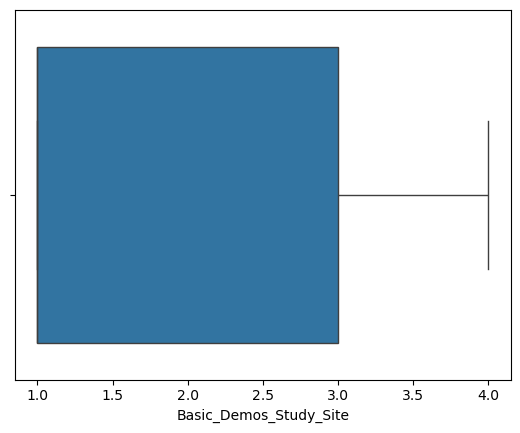

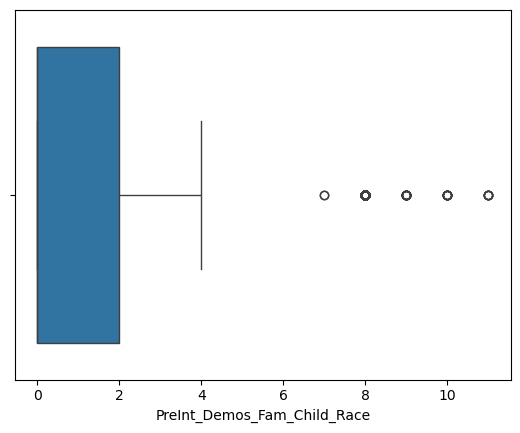

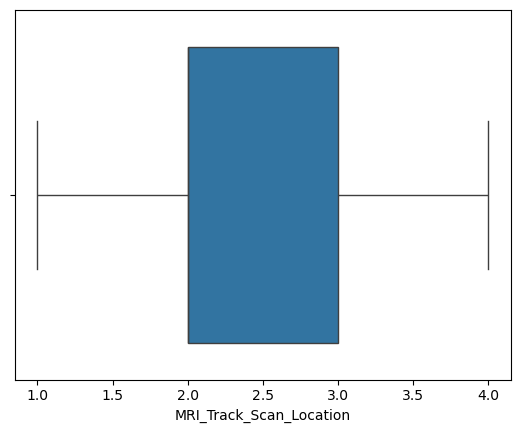

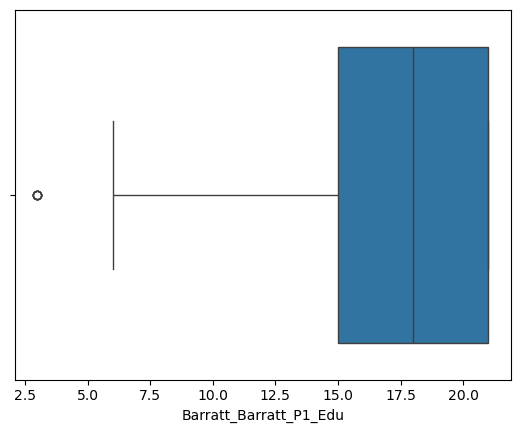

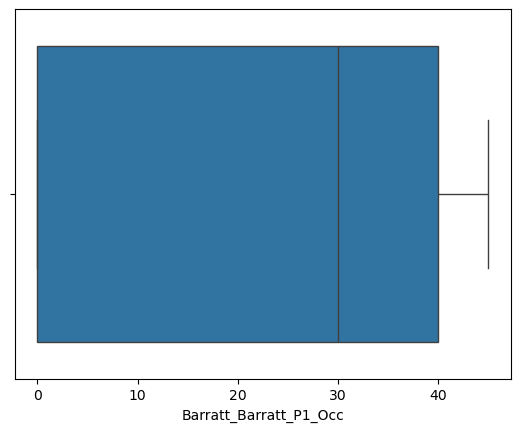

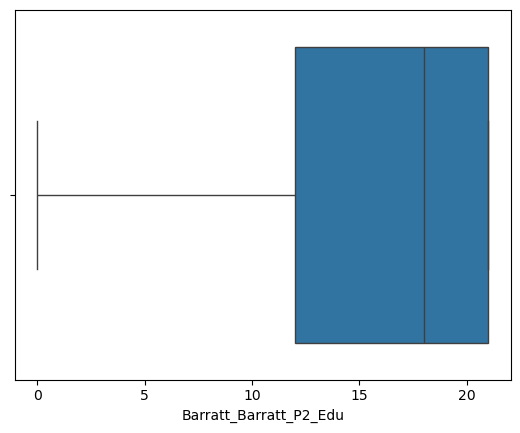

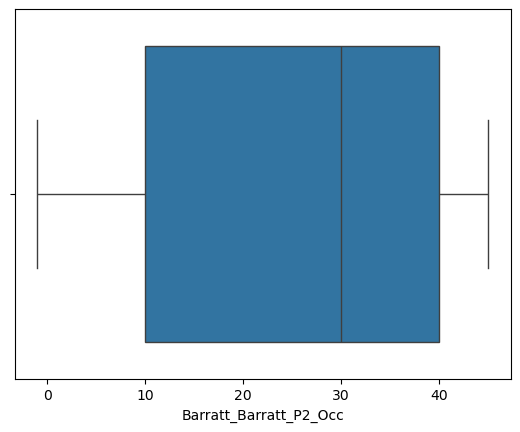

In [53]:
for col in df_cat.columns:
    plt.figure()
    sns.boxplot(data=df_cat, x=col)

Barratt_Barratt_P1_Edu
21.0    485
18.0    421
15.0    162
12.0     97
9.0      28
6.0      15
3.0       5
Name: count, dtype: int64


<Axes: xlabel='Barratt_Barratt_P1_Edu'>

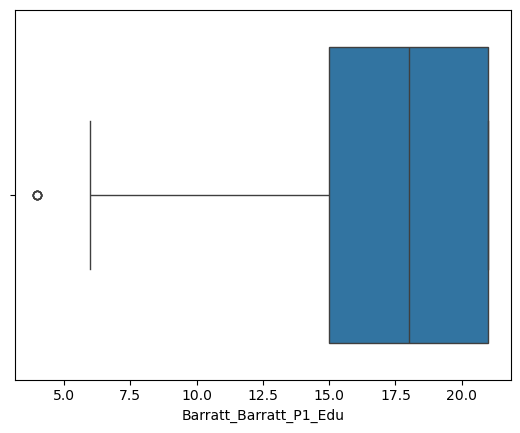

In [54]:
print (df_cat.Barratt_Barratt_P1_Edu.value_counts())
df_cat.loc[df_cat['Barratt_Barratt_P1_Edu'] < 4 , 'Barratt_Barratt_P1_Edu'] = 4
sns.boxplot(data=df_cat, x="Barratt_Barratt_P1_Edu")

In [57]:
df_cat.columns

Index(['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Race',
       'MRI_Track_Scan_Location', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ'],
      dtype='object')

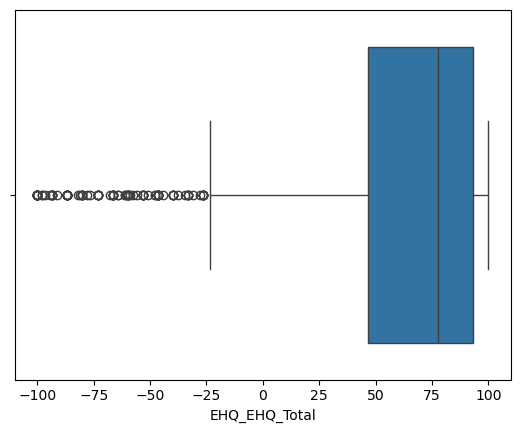

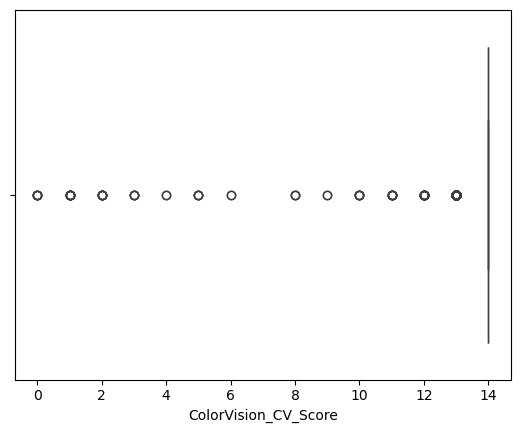

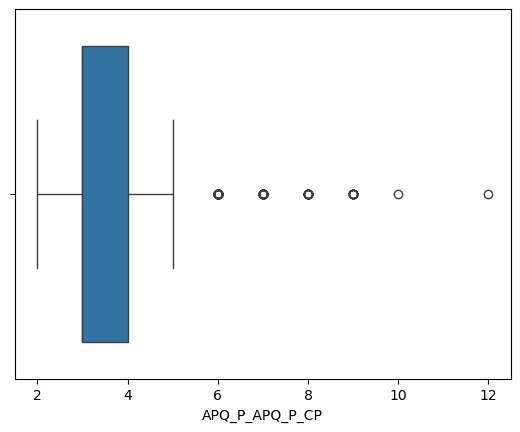

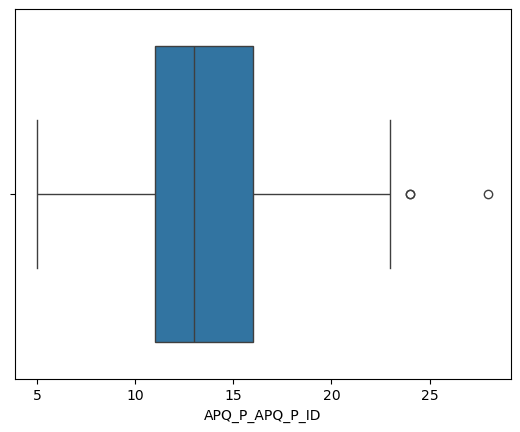

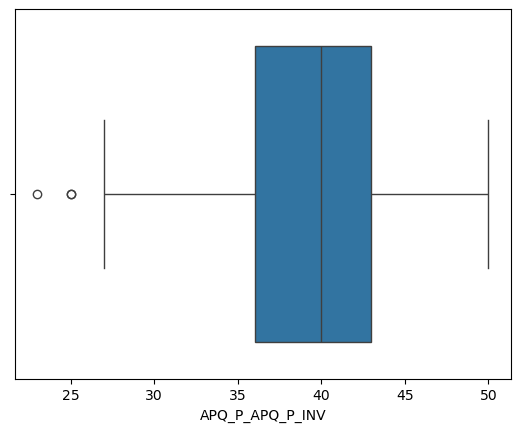

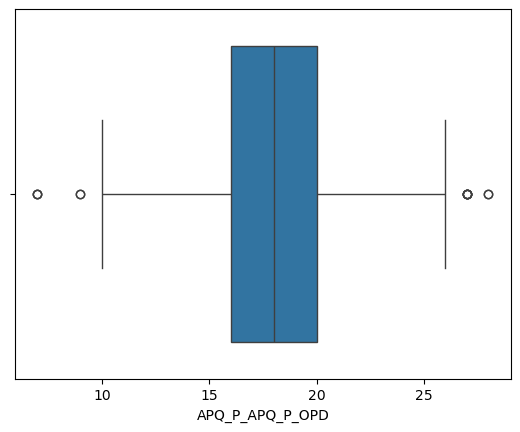

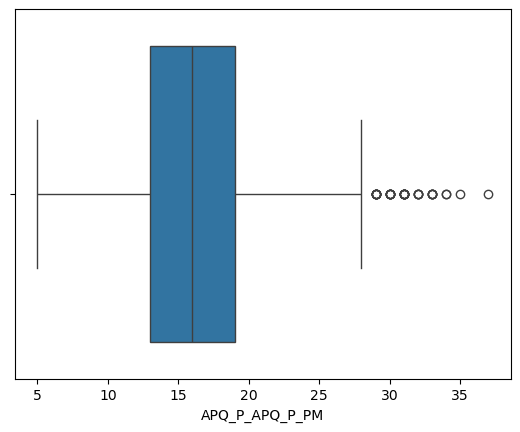

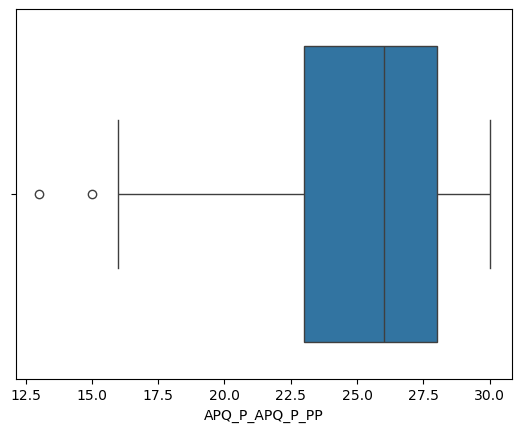

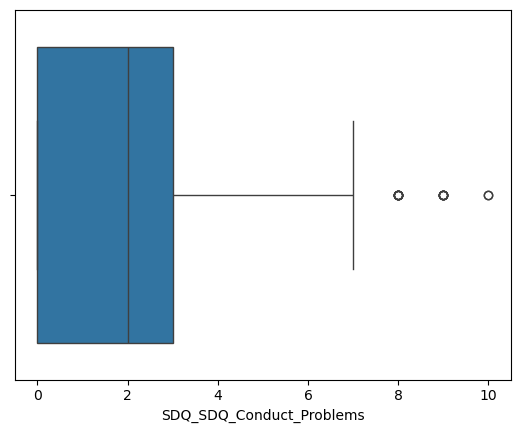

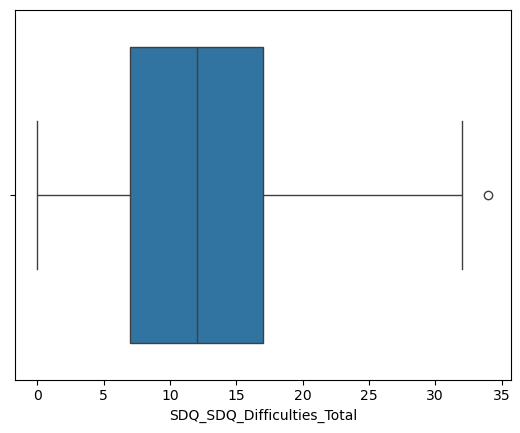

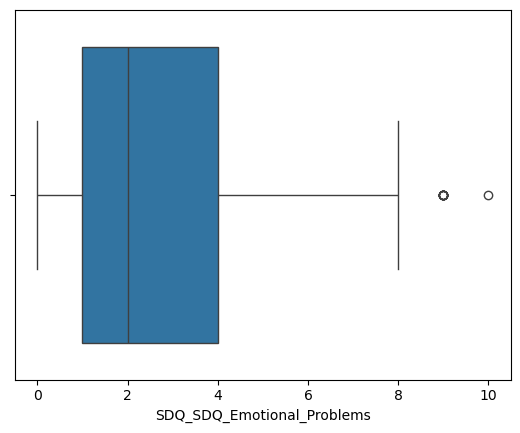

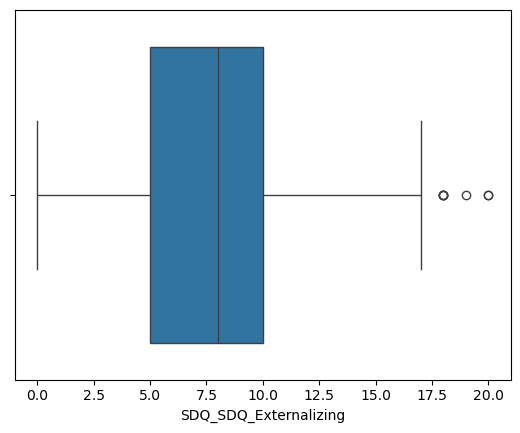

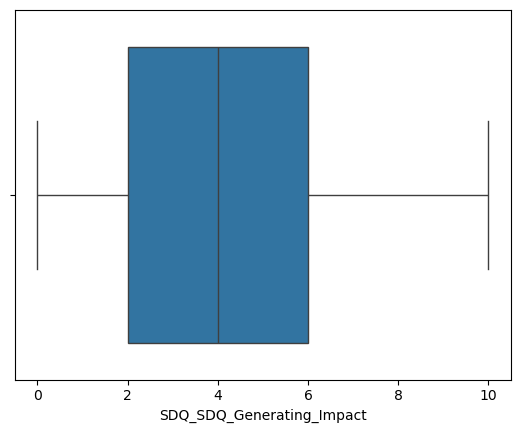

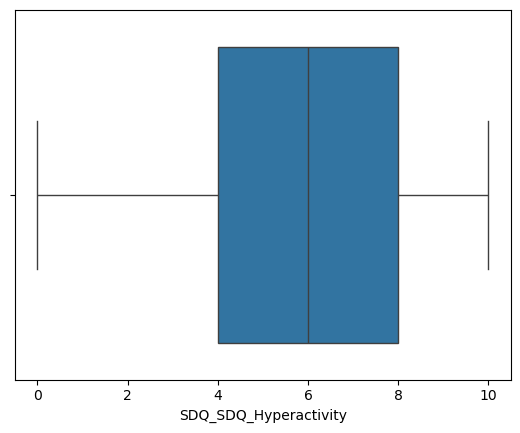

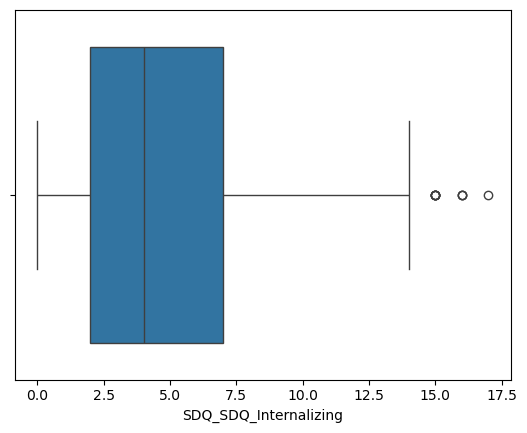

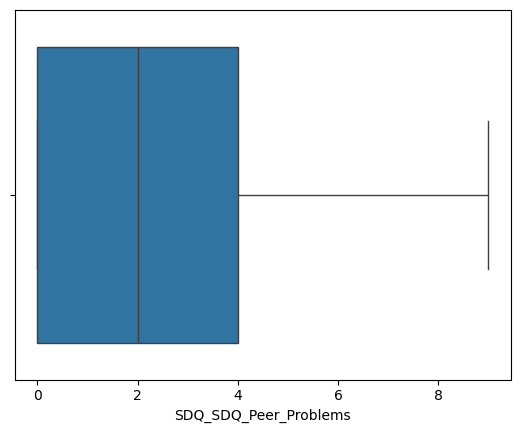

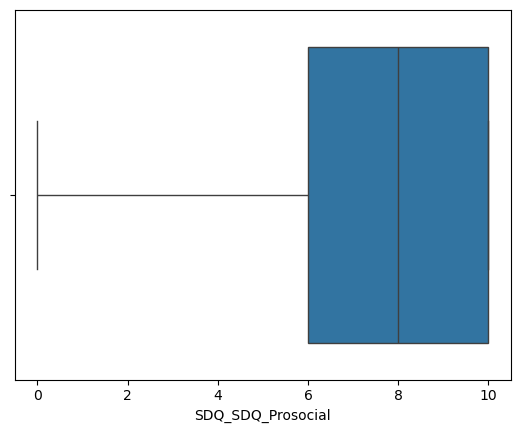

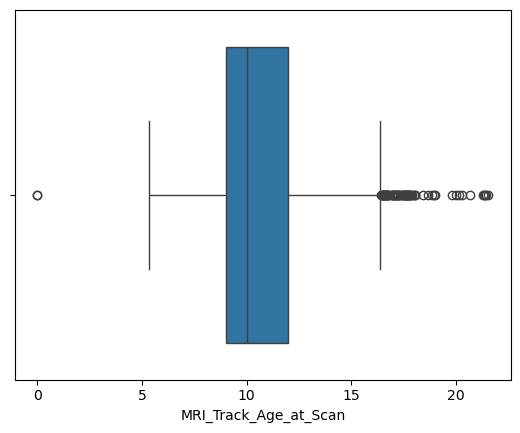

In [58]:
for col in df_quant.columns:
    plt.figure()
    sns.boxplot(data=df_quant, x=col)

## IQR-based Capping for Quantitative Data

In [61]:
for col in df_quant.columns:
    Q1 = df_quant[col].quantile(0.25)
    Q3 = df_quant[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR

    df_quant.loc[df_quant[col] < lower_cap, col] = lower_cap

    df_quant.loc[df_quant[col] > upper_cap, col] = upper_cap

# One hot encoding

In [63]:
cat_col = df_cat.columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
df_enc = encoder.fit_transform(df_cat)
encoded_cols = encoder.get_feature_names_out(cat_col)
df_cat = pd.DataFrame(df_enc, columns=encoded_cols, index=df_cat.index)


# Using Standard Scaler

In [65]:
scaler = StandardScaler()
df_quant_st = pd.DataFrame(scaler.fit_transform(df_quant), columns=df_quant.columns, index=df_quant.index)

# SMOTE

In [70]:
tmp = pd.merge(df_cat, df_quant_st, on = 'participant_id')
df = pd.merge(tmp, df_connectcome, on='participant_id')
X_train, X_test, y_train, y_test, = train_test_split(df, df_solutions, test_size=0.3)

y_train_combined = y_train['ADHD_Outcome'].astype(str) + "_"+ y_train['Sex_F'].astype(str)

# Apply SMOTE to features and combined target
smote = SMOTE(sampling_strategy='not majority', k_neighbors=5)
X_train_res, y_train_combined_res = smote.fit_resample(X_train, y_train_combined)

# Split the combined target back into separate columns
y_split = y_train_combined_res.str.split("_", expand=True)
y_train_res = pd.DataFrame({
    'ADHD_Outcome': y_split[0].astype(int),
    'Sex_F': y_split[1].astype(int) })

# KNN

In [74]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1 )
multi_knn = MultiOutputClassifier(knn)
multi_knn.fit(X_train,y_train)
y_pred = multi_knn.predict(X_test)

n_outputs = y_test.shape[1]

for i in range(n_outputs):
    print(f"\n=== Output Label {i+1} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


=== Output Label 1 ===
Confusion Matrix:
[[ 53  63]
 [129 119]]
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.46      0.36       116
           1       0.65      0.48      0.55       248

    accuracy                           0.47       364
   macro avg       0.47      0.47      0.45       364
weighted avg       0.54      0.47      0.49       364


=== Output Label 2 ===
Confusion Matrix:
[[205  33]
 [104  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.86      0.75       238
           1       0.40      0.17      0.24       126

    accuracy                           0.62       364
   macro avg       0.53      0.52      0.50       364
weighted avg       0.57      0.62      0.57       364



# Random Forest 

In [91]:
rf = RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_split=10,)
multi_rf = MultiOutputClassifier(rf)
multi_rf.fit(X_train,y_train)
y_pred = multi_rf.predict(X_test)

n_outputs = y_test.shape[1]

for i in range(n_outputs):
    print(f"\n=== Output Label {i+1} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


=== Output Label 1 ===
Confusion Matrix:
[[  1 115]
 [  1 247]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       116
           1       0.68      1.00      0.81       248

    accuracy                           0.68       364
   macro avg       0.59      0.50      0.41       364
weighted avg       0.62      0.68      0.56       364


=== Output Label 2 ===
Confusion Matrix:
[[236   2]
 [125   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.99      0.79       238
           1       0.33      0.01      0.02       126

    accuracy                           0.65       364
   macro avg       0.49      0.50      0.40       364
weighted avg       0.54      0.65      0.52       364



# Decision Tree

In [77]:
dt_clf = DecisionTreeClassifier()
multi_dt = MultiOutputClassifier(dt_clf)
multi_dt.fit(X_train,y_train)
y_pred = multi_dt.predict(X_test)

n_outputs = y_test.shape[1]

for i in range(n_outputs):
    print(f"\n=== Output Label {i+1} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))


=== Output Label 1 ===
Confusion Matrix:
[[ 62  54]
 [ 71 177]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       116
           1       0.77      0.71      0.74       248

    accuracy                           0.66       364
   macro avg       0.62      0.62      0.62       364
weighted avg       0.67      0.66      0.66       364


=== Output Label 2 ===
Confusion Matrix:
[[160  78]
 [ 62  64]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.67      0.70       238
           1       0.45      0.51      0.48       126

    accuracy                           0.62       364
   macro avg       0.59      0.59      0.59       364
weighted avg       0.63      0.62      0.62       364



# Logistic Regression 

In [78]:
log_reg = LogisticRegression(solver='saga', max_iter=1500,penalty='l1')
multi_log_reg = MultiOutputClassifier(log_reg)
multi_log_reg.fit(X_train,y_train)
y_pred = multi_log_reg.predict(X_test)

n_outputs = y_test.shape[1]

for i in range(n_outputs):
    print(f"\n=== Output Label {i+1} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test.iloc[:, i], y_pred[:, i]))
    print("Classification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== Output Label 1 ===
Confusion Matrix:
[[ 71  45]
 [ 41 207]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.61      0.62       116
           1       0.82      0.83      0.83       248

    accuracy                           0.76       364
   macro avg       0.73      0.72      0.73       364
weighted avg       0.76      0.76      0.76       364


=== Output Label 2 ===
Confusion Matrix:
[[209  29]
 [ 50  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       238
           1       0.72      0.60      0.66       126

    accuracy                           0.78       364
   macro avg       0.77      0.74      0.75       364
weighted avg       0.78      0.78      0.78       364

